# Import libraries

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Load dataset

In [57]:
try:
    data = pd.read_csv('Breast cancer dataset.csv')
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure 'Breast cancer dataset.csv' is in the correct directory.")
    raise

# Step 3: Preprocess dataset
# Identify numeric columns (excluding diagnosis for now)

In [58]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Check for missing values

In [59]:
print("\nChecking for missing values:")
print(data[numeric_cols].isna().sum())


Checking for missing values:
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Impute missing values with median for numeric columns

In [60]:
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Check for infinite values

In [61]:
print("\nChecking for infinite values:")
print(np.isinf(data[numeric_cols]).sum())
data[numeric_cols] = data[numeric_cols].replace([np.inf, -np.inf], np.nan)
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())


Checking for infinite values:
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Verify no NaNs remain

In [62]:
print("\nChecking for NaNs after imputation:")
print(data[numeric_cols].isna().sum())


Checking for NaNs after imputation:
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Encode diagnosis

In [63]:
if 'diagnosis' in data.columns:
    data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
else:
    print("Error: 'diagnosis' column not found.")
    raise KeyError("'diagnosis' column missing")


# Drop id column if present

In [64]:
if 'id' in data.columns:
    data = data.drop('id', axis=1)

# Drop zero-variance features

In [65]:
zero_variance_cols = [col for col in numeric_cols if col in data.columns and data[col].var() == 0]
print("\nZero variance columns:", zero_variance_cols)
data = data.drop(columns=zero_variance_cols)


Zero variance columns: []


# Separate features and target

In [66]:
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

# Verify no NaNs in X

In [67]:
if np.any(np.isnan(X)):
    print("Error: NaN values found in features after preprocessing.")
    raise ValueError("NaN values in X")

# Standardize features

In [68]:
scaler = StandardScaler()
try:
    X_scaled = scaler.fit_transform(X)
except ValueError as e:
    print("Error in standardization:", e)
    raise

# Split data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4 & 6: Define and implement logistic regression from scratch

In [70]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    epsilon = 1e-15
    loss = -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))
    return loss

def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = len(y)
    loss_history = []

    for i in range(num_iterations):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)
        dw = np.dot(X.T, (y_hat - y)) / m
        db = np.mean(y_hat - y)
        w -= learning_rate * dw
        b -= learning_rate * db
        loss = compute_loss(X, y, w, b)
        loss_history.append(loss)
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss:.4f}")

    return w, b, loss_history

def predict(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    return (y_hat >= threshold).astype(int)


# Train custom model

In [71]:
np.random.seed(42)
w = np.random.randn(X_train.shape[1])
b = 0
learning_rate = 0.01
num_iterations = 1000
w, b, loss_history = gradient_descent(X_train, y_train, w, b, learning_rate, num_iterations)

Iteration 0, Loss: 1.7447
Iteration 100, Loss: 0.5733
Iteration 200, Loss: 0.3398
Iteration 300, Loss: 0.2654
Iteration 400, Loss: 0.2268
Iteration 500, Loss: 0.2025
Iteration 600, Loss: 0.1855
Iteration 700, Loss: 0.1729
Iteration 800, Loss: 0.1628
Iteration 900, Loss: 0.1546


# Step 8: Evaluate custom model

In [72]:
y_pred_custom = predict(X_test, w, b)
metrics_custom = {
    'Accuracy': accuracy_score(y_test, y_pred_custom),
    'Precision': precision_score(y_test, y_pred_custom),
    'Recall': recall_score(y_test, y_pred_custom),
    'F1-Score': f1_score(y_test, y_pred_custom)
}

# Step 9: Compare with scikit-learn

In [73]:
sklearn_model = LogisticRegression(random_state=42)
try:
    sklearn_model.fit(X_train, y_train)
except ValueError as e:
    print("Error in scikit-learn fit:", e)
    raise
y_pred_sklearn = sklearn_model.predict(X_test)
metrics_sklearn = {
    'Accuracy': accuracy_score(y_test, y_pred_sklearn),
    'Precision': precision_score(y_test, y_pred_sklearn),
    'Recall': recall_score(y_test, y_pred_sklearn),
    'F1-Score': f1_score(y_test, y_pred_sklearn)
}

# Print metrics

In [74]:
print("\nCustom Model Metrics:")
for metric, value in metrics_custom.items():
    print(f"{metric}: {value:.4f}")
print("\nScikit-learn Model Metrics:")
for metric, value in metrics_sklearn.items():
    print(f"{metric}: {value:.4f}")


Custom Model Metrics:
Accuracy: 0.9474
Precision: 0.8936
Recall: 0.9767
F1-Score: 0.9333

Scikit-learn Model Metrics:
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1-Score: 0.9647


# **Step 7: Visualize loss**

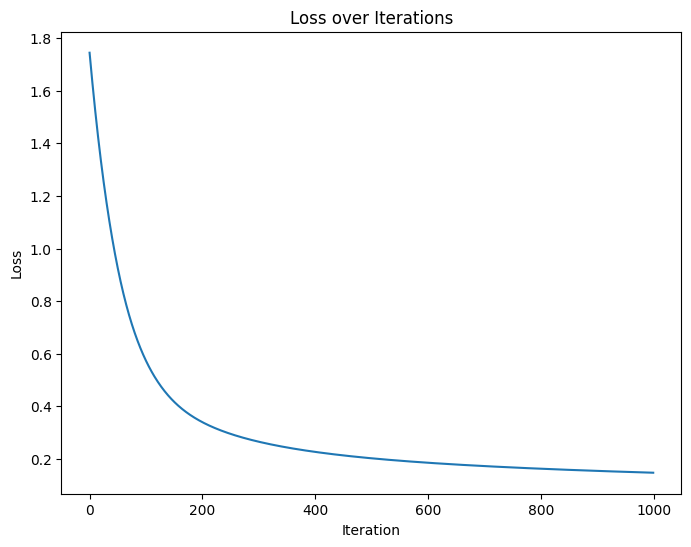

In [75]:
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), loss_history)
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.savefig('loss_plot.png')
plt.show()

# Visualize decision boundary (2D PCA)

Iteration 0, Loss: 3.2158
Iteration 100, Loss: 0.7806
Iteration 200, Loss: 0.3746
Iteration 300, Loss: 0.2475
Iteration 400, Loss: 0.2008
Iteration 500, Loss: 0.1809
Iteration 600, Loss: 0.1701
Iteration 700, Loss: 0.1632
Iteration 800, Loss: 0.1583
Iteration 900, Loss: 0.1546


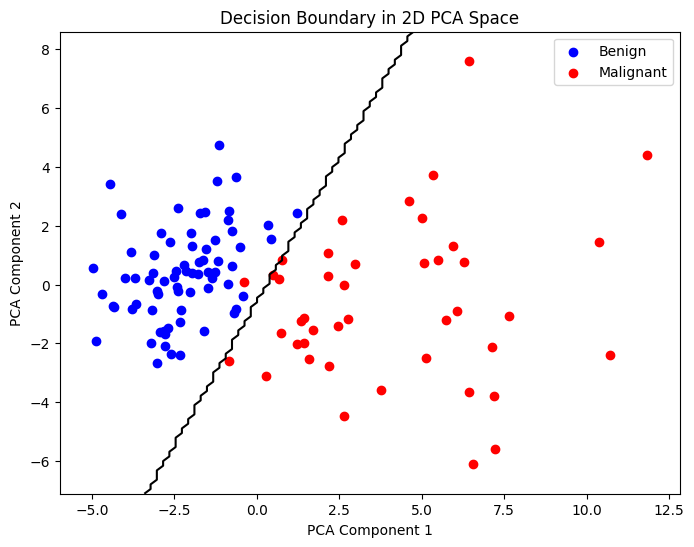

In [76]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)
w_2d = np.random.randn(2)
b_2d = 0
w_2d, b_2d, _ = gradient_descent(X_train_2d, y_train, w_2d, b_2d, learning_rate, num_iterations)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2d[y_test == 0, 0], X_test_2d[y_test == 0, 1], c='blue', label='Benign')
plt.scatter(X_test_2d[y_test == 1, 0], X_test_2d[y_test == 1, 1], c='red', label='Malignant')
x1_min, x1_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
x2_min, x2_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w_2d) + b_2d)
Z = (Z > 0.5).astype(int).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='black')
plt.title("Decision Boundary in 2D PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.savefig('boundary_plot.png')
plt.show()